# Poems dataset EDA

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import os

#from textblob import TextBlob
#from textblob.sentiments import NaiveBayesAnalyzer

#import spacy
from langdetect import detect

from googletrans import Translator

import re

In [2]:
path_data = "./spanish_poems_dataset.json"
df = pd.read_json(path_data, encoding="latin-1")
df.head()

,auth_name,poem_title,poem
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,LIRAS A UNAS VIRUELAS<SALTO>Su nombre perdió e...
1,"Abarca de Bolea, Ana Francisca","Su nombre perdió el mal, Clorinda hermosa",LIRAS A UNAS VIRUELAS<SALTO>Su nombre perdió e...
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,ROMANCE A UNA FUENTE<SALTO>Fuente que en círcu...
3,"Abarca de Bolea, Ana Francisca",Fuente que en círculo breve,ROMANCE A UNA FUENTE<SALTO>Fuente que en círcu...
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,DÉCIMA A UN JARDÍN<SALTO>Estrella entre verdes...


In [3]:
len(df)

49954

In [4]:
df.drop_duplicates(subset=["poem"], inplace=True)

In [5]:
len(df)

27239

In [6]:
df["poem"] = df["poem"].apply(lambda x: x.replace("<SALTO>", "\n"))

In [7]:
df

,auth_name,poem_title,poem
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,LIRAS A UNAS VIRUELAS\nSu nombre perdió el mal...
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,ROMANCE A UNA FUENTE\nFuente que en círculo br...
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,DÉCIMA A UN JARDÍN\nEstrella entre verdes hoja...
6,"Abarca de Bolea, Ana Francisca",SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...,SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...
8,"Abarca de Bolea, Ana Francisca",Recorro el parloteo de las hojas,"SONETO\nRecorro el parloteo de las hojas,\npes..."
...,...,...,...
49937,"Zorrilla, Jos",La noche no tiene ruido,"ROMANCE\n La noche no tiene ruido,\nEn la ..."
49938,"Zorrilla, Jos","Mañana voy, nazarena","ORIENTAL\n Mañana voy, nazarena,\nA Córdob..."
49939,"Zorrilla, Jos",MEDITACIÓN,MEDITACIÓN\n Sobre ignorada tumba solitari...
49941,"Zorrilla, Jos","Negra, ruinosa, sola y olvidada","TOLEDO\n I\nNegra, ruinosa..."


In [8]:
print(df.iloc[700]["poem"])

TABLA Y MANO
Delante está la mesa.
No pájaros o flores. Cuatro naipes, un vaso.
La mano está en la tabla. Tabla o mano, mezcladas no,
confusas —confundidas—.
La mano quieta asoma por un puño gastado;
rugosa, casi vegetal aparece, explora, avanza,
ya está toda visible: ahora se apoya
sobre la tabla hermana.
Un vidrio deslustrado, con un poso rojizo, está a su vera.
Este rojo color fue de oro dulce,
campo feliz, los granos rezumantes.
Pájaros inocentes volaban bajo el cielo.
Azul, azul, con el verdor de la uva.
Y los pámpanos, anchos.
Ahora la tabla, materia solo cuyo origen se oculta,
cubierta está por mucha vida que no estuvo en sus ramas.
Ella creciera en un haya graciosa.
Cerca las viñas y sus uvas claras,
ávidas de este sol que las aprieta.
Creció la tabla pura y extendió sus ramajes,
y virgen los abrió solo a los cielos.
Pero un filo feroz fue la respuesta.
Con sangre no, con savia, fue abatida,
tabla que palpitaba allí invisible,
bajo la injuria abierta.
Una sierra fue luego, su m

In [9]:
for n, a in zip(df["auth_name"].value_counts(), df["auth_name"].unique()):
    print(f"{a:35}: {n}")

Abarca de Bolea, Ana Francisca     : 533
Abente y Lago, Victorino           : 488
Aburto Uribe, Teresa               : 486
Aching Samatelo, Csar              : 478
Acosta Snchez, Juan F.             : 446
Acua, Hernando de                  : 436
Acua, Manuel                       : 430
Adames, Roberto Jos                : 427
Adrados Maestre, Enrique           : 394
Aguijonmagico                      : 373
Aguilar, Gaspar                    : 337
Aguirre, Mirta                     : 329
Aguirre y Fierro,Guillermo         : 314
Agustini, Delmira                  : 287
Ainchil, Claudia                   : 272
Akinin Levy, Samuel                : 272
Al Haded, Al                       : 256
Alarcn, Pedro Antonio de           : 252
Alba, Juan Luis                    : 252
Albano, Genaro                     : 239
Alberca, Marta                     : 233
Alberti, Rafael                    : 230
Albstur, Jacinto                   : 229
Alcntara Fdez., Orlando            : 224
Alczar, Baltasar

## Language detection

In [10]:
def detect_lang(text):
    lang = "unk"
    try:
        lang = detect(text)
    except Exception as e:
        pass
    return lang

In [11]:
df["language"] = df["poem"].apply(lambda x: detect_lang(x))

In [12]:
df["language"].unique()

array(['es', 'pt', 'ca', 'lt', 'en', 'it', 'hr', 'fr', 'unk'],
      dtype=object)

In [13]:
print(df[df["language"] == "pt"].iloc[0]["poem"])

MADRID
   Por amiga, por amiga.
Sólo por amiga.
   Por amante, por querida.
Sólo por querida.
   Por esposa, no.
Sólo por amiga.


In [14]:
print(df[df["language"] == "pt"].iloc[1]["poem"])

CANTIGA LXV
 Como Santa Maria fez soltar o ome que andara gran tempo escomungado.
A creer devemos que todo pecado
Deus pola sa Madr' averá
perdõado.
Porend' un miragre vos direi mui grande
que Santa Maria fez; e ela mande
que mostra-lo possa per mi e non ande
demandand' a outre que m'en dé recado.
A creer devemos que todo pecado
Deus pola sa Madr' averá perdõado.
Poren direi com' un clerig' aldeão,
de mui santa vida e mui bon crischão,
ouv' un seu feegres sobervi' e loução,
que nunca queria fazer seu mandado.
A creer devemos que todo pecado
Deus pola sa Madr' averá perdõado.
E o ome bõo sempre lle rogava
que sse corregesse e o castigava;
mais aquel vilão poren ren non dava,
assi o tragia o dem' enganado.
A creer devemos que todo pecado
Deus pola sa Madr' averá perdõado.
Pois que o preste viu que mõestamento
non lle valia ren ha vez nen çento,
escomungou-o enton por escarmento,
cuidando que fosse per i castigado.
A creer devemos que todo pecado
Deus pola sa Madr' averá perdõado.
Mais el

In [15]:
print(df[df["language"] == "pt"].iloc[2]["poem"])

CANTIGA CCLXVII [ = CCCLXXIII ]
 Como Santa Maria livrou un mercador do perigoo das ondas do mar en que cuidava [morrer] u caera da nave.
A [de] que Deus pres carn' e foi dela nado,
ben pode valer a todo perigoado.
Ca per ela foi a morte destroyda
e nossa saude cobrada e vida,
tod' est avemos pola Sennor comprida.
Pois un seu miragre vos direi de grado
A [de] que Deus pres carn' e foi dela nado,
ben pode valer a todo perigoado.
Que fez esta Virgen santa e Reynna,
que é dos coitados todos meeza;
contar-vo-lo-ei brevement' e agynna
quant' end' aprendi a quen mio á contado.
A [de] que Deus pres carn' e foi dela nado,
ben pode valer a todo perigoado.
Entre Doir' e Mynn' en Portugal morava
un mercador [rico] muito que amava
Santa Maria e por ela fiava,
e ena servir sempr' era seu cuidado.
A [de] que Deus pres carn' e foi dela nado,
ben pode valer a todo perigoado.
Como quer que el pelas terras mercasse,
se dõa fremos' e aposta achasse
e que pera o altar lle semellasse,
de lla aduzer era mui

In [16]:
print(df[df["language"] == "ca"].iloc[0]["poem"])

CANTIGA XCVII
 Como Santa Maria quis guardar de morte un privado dun rey que o avian mezcrado.
A Virgen sempr' acorrer,
acorrer
vai o coitad', e valer,
e valer.
Dest' un miragre vos contarey
que en Canete, per com' achey,
a Virgen por un ome dun Rey
fez, que mezcraran, com' apres' ey;
e ben sey
que o cuidaran a fazer morrer.
A Virgen sempr' acorrer,
acorrer
vai o coitad', e valer,
e valer.
De tal guisa o foron mezcrar,
que o mandou log' el Rei chamar
ante si. Mas el con gran pesar
e con coita fillou-ss' a chorar
e rogar
a Virgen quanto mais podo fazer.
A Virgen sempr' acorrer,
acorrer
vai o coitad', e valer,
e valer.
Demais un rico pano y deu
na eigreja e fezo-sse seu
ome da Virgen, com' aprix eu;
e est' avia nome Mateu,
a ben leu
pode-l-an en cas del Rei connocer.
A Virgen sempr' acorrer,
acorrer
vai o coitad', e valer,
e valer.
E pois na eigreja pos seu don
e fez chorando ssa oraçon,
meteu-sse ao cam' enton
con mui gran med' en seu coraçon,
de lijon
ou de morte por tal mezcra prender

In [17]:
print(df[df["language"] == "en"].iloc[0]["poem"])

FAREWELL IN THE WELFARE ISLAND
It has to come from here,
right this instance,
my cry into the world.
Life was somewhere forgotten
and sought refuge in depths of tears
and sorrows
over this vast empire of solitude
and darkness.
Where is the voice of freedom,
freedom to laugh,
to move
without the heavy phantom of despair?
Where is the form of beauty
unshaken in its veil, simple and pure?
Where is the warmth of heaven
pouring its dreams of love in broken spirits?
It has to be from here,
right this instance,
my cry into the world.
My cry that is no more mine,
but hers and his forever,
the comrades of my silence,
the phantoms of my grave.
It has to be from here,
forgotten but unshaken,
among comrades of silence
deep into Welfare Island
my farewell to the world.


In [18]:
print(df[df["language"] == "it"].iloc[0]["poem"])

EN UN ÁLBUM DE UNA PRINCESA ITALIANA
Veggo ardente nel cielo sffolgorare
de sua corona l'ornamento chiaro,
quel chi la luce dá superbo faro
e quel chi fá le piante germinare.
Veggo in la schezzia il pianto scintillare
de la matina, che á la terra è caro,
ascolto il fiume fra l'olcandro amaro
sulla pianura herbosa mormorare:
Odo l'uccelli e la sonora aureta
chi pello azurro spazzio tende il vuolo,
ma questa bello assai ridente stuolo
L'anima mia ancor non rende lietta:
sul bracio trista e languida mi piego
ch''il mio diletto ¡aimè! mai più non veggo!


Alguna falla, pero mayoritariamente está bien y creo que es positivo quedarse solo los que estén en español

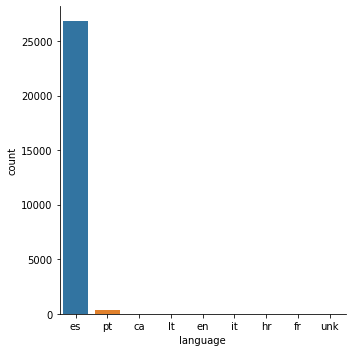

In [19]:
sns.catplot(data = df, x="language", kind="count")

No es una gran pérdida

In [20]:
df[df["language"]=="unk"]

,auth_name,poem_title,poem,language
39514,"Paz, Octavio",Topoema,,unk


In [21]:
indexes = df[df["language"] != "es"].index

In [22]:
df.drop(indexes, axis=0, inplace=True)

## Data augmentation

In [33]:
number = len(df)
def augmentate(text, translate):
    poems = [text]
    global number
    number -=1
    print(f"quedan: {number}")
    try:
    
        #for lang in ["fr", "pt", "en", "af", "sq", "ko"]:
        for lang in ["ko", "fr"]:
            translation = translate.translate(text, dest=lang)
            augmented = translate.translate(translation.text, dest="es")
            poems.append(augmented.text)
        
    except Exception as e:
        print(e)
        
    return poems
    

In [34]:
df.drop_duplicates(subset=["poem"], inplace=True)

In [35]:
len(df)

26825

In [36]:
translate = Translator()
df["poem"] = df["poem"].apply(lambda x: augmentate(x, translate))

quedan: 26824
quedan: 26823
quedan: 26822
quedan: 26821
quedan: 26820
quedan: 26819
quedan: 26818
quedan: 26817
quedan: 26816
quedan: 26815
quedan: 26814
quedan: 26813
quedan: 26812
quedan: 26811
quedan: 26810
quedan: 26809
quedan: 26808
quedan: 26807
quedan: 26806
quedan: 26805
quedan: 26804
quedan: 26803
quedan: 26802
quedan: 26801
quedan: 26800
quedan: 26799
quedan: 26798
quedan: 26797
quedan: 26796
quedan: 26795
quedan: 26794
quedan: 26793
quedan: 26792
quedan: 26791
quedan: 26790
quedan: 26789
quedan: 26788
quedan: 26787
quedan: 26786
quedan: 26785
quedan: 26784
quedan: 26783
quedan: 26782
quedan: 26781
quedan: 26780
quedan: 26779
quedan: 26778
quedan: 26777
quedan: 26776
quedan: 26775
quedan: 26774
quedan: 26773
quedan: 26772
quedan: 26771
quedan: 26770
quedan: 26769
quedan: 26768
quedan: 26767
quedan: 26766
quedan: 26765
quedan: 26764
quedan: 26763
quedan: 26762
quedan: 26761
quedan: 26760
quedan: 26759
quedan: 26758
quedan: 26757
quedan: 26756
quedan: 26755
quedan: 26754
quedan

quedan: 26283
quedan: 26282
quedan: 26281
quedan: 26280
quedan: 26279
quedan: 26278
quedan: 26277
quedan: 26276
quedan: 26275
quedan: 26274
quedan: 26273
quedan: 26272
quedan: 26271
quedan: 26270
quedan: 26269
quedan: 26268
quedan: 26267
quedan: 26266
quedan: 26265
quedan: 26264
quedan: 26263
quedan: 26262
quedan: 26261
quedan: 26260
quedan: 26259
quedan: 26258
quedan: 26257
quedan: 26256
quedan: 26255
quedan: 26254
quedan: 26253
quedan: 26252
quedan: 26251
quedan: 26250
quedan: 26249
quedan: 26248
quedan: 26247
quedan: 26246
quedan: 26245
quedan: 26244
quedan: 26243
quedan: 26242
quedan: 26241
quedan: 26240
quedan: 26239
quedan: 26238
quedan: 26237
quedan: 26236
quedan: 26235
quedan: 26234
quedan: 26233
quedan: 26232
quedan: 26231
quedan: 26230
quedan: 26229
quedan: 26228
quedan: 26227
quedan: 26226
quedan: 26225
quedan: 26224
quedan: 26223
quedan: 26222
quedan: 26221
quedan: 26220
quedan: 26219
quedan: 26218
quedan: 26217
quedan: 26216
quedan: 26215
quedan: 26214
quedan: 26213
quedan

quedan: 25724
quedan: 25723
quedan: 25722
quedan: 25721
quedan: 25720
quedan: 25719
quedan: 25718
quedan: 25717
quedan: 25716
quedan: 25715
quedan: 25714
quedan: 25713
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 25712
quedan: 25711
quedan: 25710
quedan: 25709
quedan: 25708
quedan: 25707
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 25706
quedan: 25705
quedan: 25704
quedan: 25703
quedan: 25702
quedan: 25701
quedan: 25700
quedan: 25699
quedan: 25698
quedan: 25697
quedan: 25696
quedan: 25695
quedan: 25694
quedan: 25693
quedan: 25692
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 25691
quedan: 25690
quedan: 25689
quedan: 25688
quedan: 25687
quedan: 25686
quedan: 25685
quedan: 25684
quedan: 25683
quedan: 25682
quedan: 25681
quedan: 25680
quedan: 25679
quedan: 25678
quedan: 25677
quedan: 25676
quedan: 25675
quedan: 25674
quedan: 25673
quedan: 25672
quedan: 25671
quedan: 25670
quedan: 25669
quedan: 25668
quedan: 25667
qu

quedan: 25178
quedan: 25177
quedan: 25176
quedan: 25175
quedan: 25174
quedan: 25173
quedan: 25172
quedan: 25171
quedan: 25170
quedan: 25169
quedan: 25168
quedan: 25167
quedan: 25166
quedan: 25165
quedan: 25164
quedan: 25163
quedan: 25162
quedan: 25161
quedan: 25160
quedan: 25159
quedan: 25158
quedan: 25157
quedan: 25156
quedan: 25155
quedan: 25154
quedan: 25153
quedan: 25152
quedan: 25151
quedan: 25150
quedan: 25149
quedan: 25148
quedan: 25147
quedan: 25146
quedan: 25145
quedan: 25144
quedan: 25143
quedan: 25142
quedan: 25141
quedan: 25140
quedan: 25139
quedan: 25138
quedan: 25137
quedan: 25136
quedan: 25135
quedan: 25134
quedan: 25133
quedan: 25132
quedan: 25131
quedan: 25130
quedan: 25129
quedan: 25128
quedan: 25127
quedan: 25126
quedan: 25125
quedan: 25124
quedan: 25123
quedan: 25122
quedan: 25121
quedan: 25120
quedan: 25119
quedan: 25118
quedan: 25117
quedan: 25116
quedan: 25115
quedan: 25114
quedan: 25113
quedan: 25112
quedan: 25111
quedan: 25110
quedan: 25109
quedan: 25108
quedan

quedan: 24690
quedan: 24689
quedan: 24688
quedan: 24687
quedan: 24686
quedan: 24685
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 24684
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 24683
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 24682
quedan: 24681
quedan: 24680
quedan: 24679
quedan: 24678
quedan: 24677
quedan: 24676
quedan: 24675
quedan: 24674
quedan: 24673
quedan: 24672
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 24671
quedan: 24670
quedan: 24669
quedan: 24668
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 24667
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 24666
quedan: 24665
quedan: 24664
quedan: 24663
quedan: 24662
quedan: 24661
quedan: 24660
quedan: 24659
quedan: 24658
quedan: 24657
quedan: 24656
quedan: 24655
quedan: 24654
quedan: 24653
quedan: 24652
quedan: 24651
quedan: 24650
quedan: 24649
quedan: 24648
quedan: 24647
quedan: 2464

quedan: 24157
quedan: 24156
quedan: 24155
quedan: 24154
quedan: 24153
quedan: 24152
quedan: 24151
quedan: 24150
quedan: 24149
quedan: 24148
quedan: 24147
quedan: 24146
quedan: 24145
quedan: 24144
quedan: 24143
quedan: 24142
quedan: 24141
quedan: 24140
quedan: 24139
quedan: 24138
quedan: 24137
quedan: 24136
quedan: 24135
quedan: 24134
quedan: 24133
quedan: 24132
quedan: 24131
quedan: 24130
quedan: 24129
quedan: 24128
quedan: 24127
quedan: 24126
quedan: 24125
quedan: 24124
quedan: 24123
quedan: 24122
quedan: 24121
quedan: 24120
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 24119
quedan: 24118
quedan: 24117
quedan: 24116
quedan: 24115
quedan: 24114
quedan: 24113
quedan: 24112
quedan: 24111
quedan: 24110
quedan: 24109
quedan: 24108
quedan: 24107
quedan: 24106
quedan: 24105
quedan: 24104
quedan: 24103
quedan: 24102
quedan: 24101
quedan: 24100
quedan: 24099
quedan: 24098
quedan: 24097
quedan: 24096
quedan: 24095
quedan: 24094
quedan: 24093
quedan: 24092
quedan: 24091


quedan: 23687
quedan: 23686
quedan: 23685
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23684
quedan: 23683
quedan: 23682
quedan: 23681
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23680
quedan: 23679
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23678
quedan: 23677
quedan: 23676
quedan: 23675
quedan: 23674
quedan: 23673
quedan: 23672
quedan: 23671
quedan: 23670
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23669
quedan: 23668
quedan: 23667
quedan: 23666
quedan: 23665
quedan: 23664
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23663
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23662
quedan: 23661
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23660
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23659
quedan: 23658
quedan: 23657
quedan: 23656
quedan: 23655
quedan: 23654
quedan: 23653
quedan: 23652


quedan: 23190
quedan: 23189
quedan: 23188
quedan: 23187
quedan: 23186
quedan: 23185
quedan: 23184
quedan: 23183
quedan: 23182
quedan: 23181
quedan: 23180
quedan: 23179
quedan: 23178
quedan: 23177
quedan: 23176
quedan: 23175
quedan: 23174
quedan: 23173
quedan: 23172
quedan: 23171
quedan: 23170
quedan: 23169
quedan: 23168
quedan: 23167
quedan: 23166
quedan: 23165
quedan: 23164
quedan: 23163
quedan: 23162
quedan: 23161
quedan: 23160
quedan: 23159
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 23158
quedan: 23157
quedan: 23156
quedan: 23155
quedan: 23154
quedan: 23153
quedan: 23152
quedan: 23151
quedan: 23150
quedan: 23149
quedan: 23148
quedan: 23147
quedan: 23146
quedan: 23145
quedan: 23144
quedan: 23143
quedan: 23142
quedan: 23141
quedan: 23140
quedan: 23139
quedan: 23138
quedan: 23137
quedan: 23136
quedan: 23135
quedan: 23134
quedan: 23133
quedan: 23132
quedan: 23131
quedan: 23130
quedan: 23129
quedan: 23128
quedan: 23127
quedan: 23126
quedan: 23125
quedan: 23124


quedan: 22631
quedan: 22630
quedan: 22629
quedan: 22628
quedan: 22627
quedan: 22626
quedan: 22625
quedan: 22624
quedan: 22623
quedan: 22622
quedan: 22621
quedan: 22620
quedan: 22619
quedan: 22618
quedan: 22617
quedan: 22616
quedan: 22615
quedan: 22614
quedan: 22613
quedan: 22612
quedan: 22611
quedan: 22610
quedan: 22609
quedan: 22608
quedan: 22607
quedan: 22606
quedan: 22605
quedan: 22604
quedan: 22603
quedan: 22602
quedan: 22601
quedan: 22600
quedan: 22599
quedan: 22598
quedan: 22597
quedan: 22596
quedan: 22595
quedan: 22594
quedan: 22593
quedan: 22592
quedan: 22591
quedan: 22590
quedan: 22589
quedan: 22588
quedan: 22587
quedan: 22586
quedan: 22585
quedan: 22584
quedan: 22583
quedan: 22582
quedan: 22581
quedan: 22580
quedan: 22579
quedan: 22578
quedan: 22577
quedan: 22576
quedan: 22575
quedan: 22574
quedan: 22573
quedan: 22572
quedan: 22571
quedan: 22570
quedan: 22569
quedan: 22568
quedan: 22567
quedan: 22566
quedan: 22565
quedan: 22564
quedan: 22563
quedan: 22562
quedan: 22561
quedan

quedan: 22108
quedan: 22107
quedan: 22106
quedan: 22105
quedan: 22104
quedan: 22103
quedan: 22102
quedan: 22101
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 22100
quedan: 22099
quedan: 22098
quedan: 22097
quedan: 22096
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 22095
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 22094
quedan: 22093
quedan: 22092
quedan: 22091
quedan: 22090
quedan: 22089
quedan: 22088
quedan: 22087
quedan: 22086
quedan: 22085
quedan: 22084
quedan: 22083
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 22082
quedan: 22081
quedan: 22080
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 22079
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 22078
quedan: 22077
quedan: 22076
quedan: 22075
quedan: 22074
quedan: 22073
quedan: 22072
quedan: 22071
quedan: 22070
quedan: 22069
quedan: 22068
quedan: 22067
quedan: 22066
quedan: 22065
quedan: 2206

quedan: 21569
quedan: 21568
quedan: 21567
quedan: 21566
quedan: 21565
quedan: 21564
quedan: 21563
quedan: 21562
quedan: 21561
quedan: 21560
quedan: 21559
quedan: 21558
quedan: 21557
quedan: 21556
quedan: 21555
quedan: 21554
quedan: 21553
quedan: 21552
quedan: 21551
quedan: 21550
quedan: 21549
quedan: 21548
quedan: 21547
quedan: 21546
quedan: 21545
quedan: 21544
quedan: 21543
quedan: 21542
quedan: 21541
quedan: 21540
quedan: 21539
quedan: 21538
quedan: 21537
quedan: 21536
quedan: 21535
quedan: 21534
quedan: 21533
quedan: 21532
quedan: 21531
quedan: 21530
quedan: 21529
quedan: 21528
quedan: 21527
quedan: 21526
quedan: 21525
quedan: 21524
quedan: 21523
quedan: 21522
quedan: 21521
quedan: 21520
quedan: 21519
quedan: 21518
quedan: 21517
quedan: 21516
quedan: 21515
quedan: 21514
quedan: 21513
quedan: 21512
quedan: 21511
quedan: 21510
quedan: 21509
quedan: 21508
quedan: 21507
quedan: 21506
quedan: 21505
quedan: 21504
quedan: 21503
quedan: 21502
quedan: 21501
quedan: 21500
quedan: 21499
quedan

quedan: 21010
quedan: 21009
quedan: 21008
quedan: 21007
quedan: 21006
quedan: 21005
quedan: 21004
quedan: 21003
quedan: 21002
quedan: 21001
quedan: 21000
quedan: 20999
quedan: 20998
quedan: 20997
quedan: 20996
quedan: 20995
quedan: 20994
quedan: 20993
quedan: 20992
quedan: 20991
quedan: 20990
quedan: 20989
quedan: 20988
quedan: 20987
quedan: 20986
quedan: 20985
quedan: 20984
quedan: 20983
quedan: 20982
quedan: 20981
quedan: 20980
quedan: 20979
quedan: 20978
quedan: 20977
quedan: 20976
quedan: 20975
quedan: 20974
quedan: 20973
quedan: 20972
quedan: 20971
quedan: 20970
quedan: 20969
quedan: 20968
quedan: 20967
quedan: 20966
quedan: 20965
quedan: 20964
quedan: 20963
quedan: 20962
quedan: 20961
quedan: 20960
quedan: 20959
quedan: 20958
quedan: 20957
quedan: 20956
quedan: 20955
quedan: 20954
quedan: 20953
quedan: 20952
quedan: 20951
quedan: 20950
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 20949
quedan: 20948
quedan: 20947
quedan: 20946
quedan: 20945
quedan: 20944


quedan: 20464
quedan: 20463
quedan: 20462
quedan: 20461
quedan: 20460
quedan: 20459
quedan: 20458
quedan: 20457
quedan: 20456
quedan: 20455
quedan: 20454
quedan: 20453
quedan: 20452
quedan: 20451
quedan: 20450
quedan: 20449
quedan: 20448
quedan: 20447
quedan: 20446
quedan: 20445
quedan: 20444
quedan: 20443
quedan: 20442
quedan: 20441
quedan: 20440
quedan: 20439
quedan: 20438
quedan: 20437
quedan: 20436
quedan: 20435
quedan: 20434
quedan: 20433
quedan: 20432
quedan: 20431
quedan: 20430
quedan: 20429
quedan: 20428
quedan: 20427
quedan: 20426
quedan: 20425
quedan: 20424
quedan: 20423
quedan: 20422
quedan: 20421
quedan: 20420
quedan: 20419
quedan: 20418
quedan: 20417
quedan: 20416
quedan: 20415
quedan: 20414
quedan: 20413
quedan: 20412
quedan: 20411
quedan: 20410
quedan: 20409
quedan: 20408
quedan: 20407
quedan: 20406
quedan: 20405
quedan: 20404
quedan: 20403
quedan: 20402
quedan: 20401
quedan: 20400
quedan: 20399
quedan: 20398
quedan: 20397
quedan: 20396
quedan: 20395
quedan: 20394
quedan

quedan: 19909
quedan: 19908
quedan: 19907
quedan: 19906
quedan: 19905
quedan: 19904
quedan: 19903
quedan: 19902
quedan: 19901
quedan: 19900
quedan: 19899
quedan: 19898
quedan: 19897
quedan: 19896
quedan: 19895
quedan: 19894
quedan: 19893
quedan: 19892
quedan: 19891
quedan: 19890
quedan: 19889
quedan: 19888
quedan: 19887
quedan: 19886
quedan: 19885
quedan: 19884
quedan: 19883
quedan: 19882
quedan: 19881
quedan: 19880
quedan: 19879
quedan: 19878
quedan: 19877
quedan: 19876
quedan: 19875
quedan: 19874
quedan: 19873
quedan: 19872
quedan: 19871
quedan: 19870
quedan: 19869
quedan: 19868
quedan: 19867
quedan: 19866
quedan: 19865
quedan: 19864
quedan: 19863
quedan: 19862
quedan: 19861
quedan: 19860
quedan: 19859
quedan: 19858
quedan: 19857
quedan: 19856
quedan: 19855
quedan: 19854
quedan: 19853
quedan: 19852
quedan: 19851
quedan: 19850
quedan: 19849
quedan: 19848
quedan: 19847
quedan: 19846
quedan: 19845
quedan: 19844
quedan: 19843
the JSON object must be str, bytes or bytearray, not NoneType


quedan: 19463
quedan: 19462
quedan: 19461
quedan: 19460
quedan: 19459
quedan: 19458
quedan: 19457
quedan: 19456
quedan: 19455
quedan: 19454
quedan: 19453
quedan: 19452
quedan: 19451
quedan: 19450
quedan: 19449
quedan: 19448
quedan: 19447
quedan: 19446
quedan: 19445
quedan: 19444
quedan: 19443
quedan: 19442
quedan: 19441
quedan: 19440
quedan: 19439
quedan: 19438
quedan: 19437
quedan: 19436
quedan: 19435
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 19434
quedan: 19433
quedan: 19432
quedan: 19431
quedan: 19430
quedan: 19429
quedan: 19428
quedan: 19427
quedan: 19426
quedan: 19425
quedan: 19424
quedan: 19423
quedan: 19422
quedan: 19421
quedan: 19420
quedan: 19419
quedan: 19418
quedan: 19417
quedan: 19416
quedan: 19415
quedan: 19414
quedan: 19413
quedan: 19412
quedan: 19411
quedan: 19410
quedan: 19409
quedan: 19408
quedan: 19407
quedan: 19406
quedan: 19405
quedan: 19404
quedan: 19403
quedan: 19402
quedan: 19401
quedan: 19400
quedan: 19399
quedan: 19398
quedan: 19397


quedan: 18958
quedan: 18957
quedan: 18956
quedan: 18955
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 18954
quedan: 18953
quedan: 18952
quedan: 18951
quedan: 18950
quedan: 18949
quedan: 18948
quedan: 18947
quedan: 18946
quedan: 18945
quedan: 18944
quedan: 18943
quedan: 18942
quedan: 18941
quedan: 18940
quedan: 18939
quedan: 18938
quedan: 18937
quedan: 18936
quedan: 18935
quedan: 18934
quedan: 18933
quedan: 18932
quedan: 18931
quedan: 18930
quedan: 18929
quedan: 18928
quedan: 18927
quedan: 18926
quedan: 18925
quedan: 18924
quedan: 18923
quedan: 18922
quedan: 18921
quedan: 18920
quedan: 18919
quedan: 18918
quedan: 18917
quedan: 18916
quedan: 18915
quedan: 18914
quedan: 18913
quedan: 18912
quedan: 18911
quedan: 18910
quedan: 18909
quedan: 18908
quedan: 18907
quedan: 18906
quedan: 18905
quedan: 18904
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 18903
quedan: 18902
quedan: 18901
quedan: 18900
quedan: 18899
quedan: 18898
quedan: 18897
the JSON

quedan: 18412
quedan: 18411
quedan: 18410
quedan: 18409
quedan: 18408
quedan: 18407
quedan: 18406
quedan: 18405
quedan: 18404
quedan: 18403
quedan: 18402
quedan: 18401
quedan: 18400
quedan: 18399
quedan: 18398
quedan: 18397
quedan: 18396
quedan: 18395
quedan: 18394
quedan: 18393
quedan: 18392
quedan: 18391
quedan: 18390
quedan: 18389
quedan: 18388
quedan: 18387
quedan: 18386
quedan: 18385
quedan: 18384
quedan: 18383
quedan: 18382
quedan: 18381
quedan: 18380
quedan: 18379
quedan: 18378
quedan: 18377
quedan: 18376
quedan: 18375
quedan: 18374
quedan: 18373
quedan: 18372
quedan: 18371
quedan: 18370
quedan: 18369
quedan: 18368
quedan: 18367
quedan: 18366
quedan: 18365
quedan: 18364
quedan: 18363
quedan: 18362
quedan: 18361
quedan: 18360
quedan: 18359
quedan: 18358
quedan: 18357
quedan: 18356
quedan: 18355
quedan: 18354
quedan: 18353
quedan: 18352
quedan: 18351
quedan: 18350
quedan: 18349
quedan: 18348
quedan: 18347
quedan: 18346
quedan: 18345
quedan: 18344
quedan: 18343
quedan: 18342
quedan

quedan: 17853
quedan: 17852
quedan: 17851
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 17850
quedan: 17849
quedan: 17848
quedan: 17847
quedan: 17846
quedan: 17845
quedan: 17844
quedan: 17843
quedan: 17842
quedan: 17841
quedan: 17840
quedan: 17839
quedan: 17838
quedan: 17837
quedan: 17836
quedan: 17835
quedan: 17834
quedan: 17833
quedan: 17832
quedan: 17831
quedan: 17830
quedan: 17829
quedan: 17828
quedan: 17827
quedan: 17826
quedan: 17825
quedan: 17824
quedan: 17823
quedan: 17822
quedan: 17821
quedan: 17820
quedan: 17819
quedan: 17818
quedan: 17817
quedan: 17816
quedan: 17815
quedan: 17814
quedan: 17813
quedan: 17812
quedan: 17811
quedan: 17810
quedan: 17809
quedan: 17808
quedan: 17807
quedan: 17806
quedan: 17805
quedan: 17804
quedan: 17803
quedan: 17802
quedan: 17801
quedan: 17800
quedan: 17799
quedan: 17798
quedan: 17797
quedan: 17796
quedan: 17795
quedan: 17794
quedan: 17793
quedan: 17792
quedan: 17791
quedan: 17790
quedan: 17789
quedan: 17788
quedan: 17787


quedan: 17298
quedan: 17297
quedan: 17296
quedan: 17295
quedan: 17294
quedan: 17293
quedan: 17292
quedan: 17291
quedan: 17290
quedan: 17289
quedan: 17288
quedan: 17287
quedan: 17286
quedan: 17285
quedan: 17284
quedan: 17283
quedan: 17282
quedan: 17281
quedan: 17280
quedan: 17279
quedan: 17278
quedan: 17277
quedan: 17276
quedan: 17275
quedan: 17274
quedan: 17273
quedan: 17272
quedan: 17271
quedan: 17270
quedan: 17269
quedan: 17268
quedan: 17267
quedan: 17266
quedan: 17265
quedan: 17264
quedan: 17263
quedan: 17262
quedan: 17261
quedan: 17260
quedan: 17259
quedan: 17258
quedan: 17257
quedan: 17256
quedan: 17255
quedan: 17254
quedan: 17253
quedan: 17252
quedan: 17251
quedan: 17250
quedan: 17249
quedan: 17248
quedan: 17247
quedan: 17246
quedan: 17245
quedan: 17244
quedan: 17243
quedan: 17242
quedan: 17241
quedan: 17240
quedan: 17239
quedan: 17238
quedan: 17237
quedan: 17236
quedan: 17235
quedan: 17234
quedan: 17233
quedan: 17232
quedan: 17231
quedan: 17230
quedan: 17229
quedan: 17228
quedan

quedan: 16734
quedan: 16733
quedan: 16732
quedan: 16731
quedan: 16730
quedan: 16729
quedan: 16728
quedan: 16727
quedan: 16726
quedan: 16725
quedan: 16724
quedan: 16723
quedan: 16722
quedan: 16721
quedan: 16720
quedan: 16719
quedan: 16718
quedan: 16717
quedan: 16716
quedan: 16715
quedan: 16714
quedan: 16713
quedan: 16712
quedan: 16711
quedan: 16710
quedan: 16709
quedan: 16708
quedan: 16707
quedan: 16706
quedan: 16705
quedan: 16704
quedan: 16703
quedan: 16702
quedan: 16701
quedan: 16700
quedan: 16699
quedan: 16698
quedan: 16697
quedan: 16696
quedan: 16695
quedan: 16694
quedan: 16693
quedan: 16692
quedan: 16691
quedan: 16690
quedan: 16689
quedan: 16688
quedan: 16687
quedan: 16686
quedan: 16685
quedan: 16684
quedan: 16683
quedan: 16682
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 16681
quedan: 16680
quedan: 16679
quedan: 16678
quedan: 16677
quedan: 16676
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 16675
quedan: 16674
quedan: 16673
quedan: 

quedan: 16162
quedan: 16161
quedan: 16160
quedan: 16159
quedan: 16158
quedan: 16157
quedan: 16156
quedan: 16155
quedan: 16154
quedan: 16153
quedan: 16152
quedan: 16151
quedan: 16150
quedan: 16149
quedan: 16148
quedan: 16147
quedan: 16146
quedan: 16145
quedan: 16144
quedan: 16143
quedan: 16142
quedan: 16141
quedan: 16140
quedan: 16139
quedan: 16138
quedan: 16137
quedan: 16136
quedan: 16135
quedan: 16134
quedan: 16133
quedan: 16132
quedan: 16131
quedan: 16130
quedan: 16129
quedan: 16128
quedan: 16127
quedan: 16126
quedan: 16125
quedan: 16124
quedan: 16123
quedan: 16122
quedan: 16121
quedan: 16120
quedan: 16119
quedan: 16118
quedan: 16117
quedan: 16116
quedan: 16115
quedan: 16114
quedan: 16113
quedan: 16112
quedan: 16111
quedan: 16110
quedan: 16109
quedan: 16108
quedan: 16107
quedan: 16106
quedan: 16105
quedan: 16104
quedan: 16103
quedan: 16102
quedan: 16101
quedan: 16100
quedan: 16099
quedan: 16098
quedan: 16097
quedan: 16096
quedan: 16095
quedan: 16094
quedan: 16093
quedan: 16092
quedan

quedan: 15677
quedan: 15676
quedan: 15675
quedan: 15674
quedan: 15673
quedan: 15672
quedan: 15671
quedan: 15670
quedan: 15669
quedan: 15668
quedan: 15667
quedan: 15666
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 15665
quedan: 15664
quedan: 15663
quedan: 15662
quedan: 15661
quedan: 15660
quedan: 15659
quedan: 15658
quedan: 15657
quedan: 15656
quedan: 15655
quedan: 15654
quedan: 15653
quedan: 15652
quedan: 15651
quedan: 15650
quedan: 15649
quedan: 15648
quedan: 15647
quedan: 15646
quedan: 15645
quedan: 15644
quedan: 15643
quedan: 15642
quedan: 15641
quedan: 15640
quedan: 15639
quedan: 15638
quedan: 15637
quedan: 15636
quedan: 15635
quedan: 15634
quedan: 15633
quedan: 15632
quedan: 15631
quedan: 15630
quedan: 15629
quedan: 15628
quedan: 15627
quedan: 15626
quedan: 15625
quedan: 15624
quedan: 15623
quedan: 15622
quedan: 15621
quedan: 15620
quedan: 15619
quedan: 15618
quedan: 15617
quedan: 15616
quedan: 15615
quedan: 15614
quedan: 15613
quedan: 15612
quedan: 15611


quedan: 15131
quedan: 15130
quedan: 15129
quedan: 15128
quedan: 15127
quedan: 15126
quedan: 15125
quedan: 15124
quedan: 15123
quedan: 15122
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 15121
quedan: 15120
quedan: 15119
quedan: 15118
quedan: 15117
quedan: 15116
quedan: 15115
quedan: 15114
quedan: 15113
quedan: 15112
quedan: 15111
quedan: 15110
quedan: 15109
quedan: 15108
quedan: 15107
quedan: 15106
quedan: 15105
quedan: 15104
quedan: 15103
quedan: 15102
quedan: 15101
quedan: 15100
quedan: 15099
quedan: 15098
quedan: 15097
quedan: 15096
quedan: 15095
quedan: 15094
quedan: 15093
quedan: 15092
quedan: 15091
quedan: 15090
quedan: 15089
quedan: 15088
quedan: 15087
quedan: 15086
quedan: 15085
quedan: 15084
quedan: 15083
quedan: 15082
quedan: 15081
quedan: 15080
quedan: 15079
quedan: 15078
quedan: 15077
quedan: 15076
quedan: 15075
quedan: 15074
quedan: 15073
quedan: 15072
quedan: 15071
quedan: 15070
quedan: 15069
quedan: 15068
quedan: 15067
quedan: 15066
quedan: 15065


quedan: 14576
quedan: 14575
quedan: 14574
quedan: 14573
quedan: 14572
quedan: 14571
quedan: 14570
quedan: 14569
quedan: 14568
quedan: 14567
quedan: 14566
quedan: 14565
quedan: 14564
quedan: 14563
quedan: 14562
quedan: 14561
quedan: 14560
quedan: 14559
quedan: 14558
quedan: 14557
quedan: 14556
quedan: 14555
quedan: 14554
quedan: 14553
quedan: 14552
quedan: 14551
quedan: 14550
quedan: 14549
quedan: 14548
quedan: 14547
quedan: 14546
quedan: 14545
quedan: 14544
quedan: 14543
quedan: 14542
quedan: 14541
quedan: 14540
quedan: 14539
quedan: 14538
quedan: 14537
quedan: 14536
quedan: 14535
quedan: 14534
quedan: 14533
quedan: 14532
quedan: 14531
quedan: 14530
quedan: 14529
quedan: 14528
quedan: 14527
quedan: 14526
quedan: 14525
quedan: 14524
quedan: 14523
quedan: 14522
quedan: 14521
quedan: 14520
quedan: 14519
quedan: 14518
quedan: 14517
quedan: 14516
quedan: 14515
quedan: 14514
quedan: 14513
quedan: 14512
quedan: 14511
quedan: 14510
quedan: 14509
quedan: 14508
quedan: 14507
quedan: 14506
quedan

quedan: 14046
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 14045
quedan: 14044
quedan: 14043
quedan: 14042
quedan: 14041
quedan: 14040
quedan: 14039
quedan: 14038
quedan: 14037
quedan: 14036
quedan: 14035
quedan: 14034
quedan: 14033
quedan: 14032
quedan: 14031
quedan: 14030
quedan: 14029
quedan: 14028
quedan: 14027
quedan: 14026
quedan: 14025
quedan: 14024
quedan: 14023
quedan: 14022
quedan: 14021
quedan: 14020
quedan: 14019
quedan: 14018
quedan: 14017
quedan: 14016
quedan: 14015
quedan: 14014
quedan: 14013
quedan: 14012
quedan: 14011
quedan: 14010
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 14009
quedan: 14008
quedan: 14007
quedan: 14006
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 14005
quedan: 14004
quedan: 14003
quedan: 14002
quedan: 14001
quedan: 14000
quedan: 13999
quedan: 13998
quedan: 13997
quedan: 13996
quedan: 13995
quedan: 13994
quedan: 13993
quedan: 13992
the JSON object must be str, bytes or bytear

quedan: 13509
quedan: 13508
quedan: 13507
quedan: 13506
quedan: 13505
quedan: 13504
quedan: 13503
quedan: 13502
quedan: 13501
quedan: 13500
quedan: 13499
quedan: 13498
quedan: 13497
quedan: 13496
quedan: 13495
quedan: 13494
quedan: 13493
quedan: 13492
quedan: 13491
quedan: 13490
quedan: 13489
quedan: 13488
quedan: 13487
quedan: 13486
quedan: 13485
quedan: 13484
quedan: 13483
quedan: 13482
quedan: 13481
quedan: 13480
quedan: 13479
quedan: 13478
quedan: 13477
quedan: 13476
quedan: 13475
quedan: 13474
quedan: 13473
quedan: 13472
quedan: 13471
quedan: 13470
quedan: 13469
quedan: 13468
quedan: 13467
quedan: 13466
quedan: 13465
quedan: 13464
quedan: 13463
quedan: 13462
quedan: 13461
quedan: 13460
quedan: 13459
quedan: 13458
quedan: 13457
quedan: 13456
quedan: 13455
quedan: 13454
quedan: 13453
quedan: 13452
quedan: 13451
quedan: 13450
quedan: 13449
quedan: 13448
quedan: 13447
quedan: 13446
quedan: 13445
quedan: 13444
quedan: 13443
quedan: 13442
quedan: 13441
quedan: 13440
quedan: 13439
quedan

quedan: 12945
quedan: 12944
quedan: 12943
quedan: 12942
quedan: 12941
quedan: 12940
quedan: 12939
quedan: 12938
quedan: 12937
quedan: 12936
quedan: 12935
quedan: 12934
quedan: 12933
quedan: 12932
quedan: 12931
quedan: 12930
quedan: 12929
quedan: 12928
quedan: 12927
quedan: 12926
quedan: 12925
quedan: 12924
quedan: 12923
quedan: 12922
quedan: 12921
quedan: 12920
quedan: 12919
quedan: 12918
quedan: 12917
quedan: 12916
quedan: 12915
quedan: 12914
quedan: 12913
quedan: 12912
quedan: 12911
quedan: 12910
quedan: 12909
quedan: 12908
quedan: 12907
quedan: 12906
quedan: 12905
quedan: 12904
quedan: 12903
quedan: 12902
quedan: 12901
quedan: 12900
quedan: 12899
quedan: 12898
quedan: 12897
quedan: 12896
quedan: 12895
quedan: 12894
quedan: 12893
quedan: 12892
quedan: 12891
quedan: 12890
quedan: 12889
quedan: 12888
quedan: 12887
quedan: 12886
quedan: 12885
quedan: 12884
quedan: 12883
quedan: 12882
quedan: 12881
quedan: 12880
quedan: 12879
quedan: 12878
quedan: 12877
quedan: 12876
quedan: 12875
quedan

quedan: 12404
quedan: 12403
quedan: 12402
quedan: 12401
quedan: 12400
quedan: 12399
quedan: 12398
quedan: 12397
quedan: 12396
quedan: 12395
quedan: 12394
quedan: 12393
quedan: 12392
quedan: 12391
quedan: 12390
quedan: 12389
quedan: 12388
quedan: 12387
quedan: 12386
quedan: 12385
quedan: 12384
quedan: 12383
quedan: 12382
quedan: 12381
quedan: 12380
quedan: 12379
quedan: 12378
quedan: 12377
quedan: 12376
quedan: 12375
quedan: 12374
quedan: 12373
quedan: 12372
quedan: 12371
quedan: 12370
quedan: 12369
quedan: 12368
quedan: 12367
quedan: 12366
quedan: 12365
quedan: 12364
quedan: 12363
quedan: 12362
quedan: 12361
quedan: 12360
quedan: 12359
quedan: 12358
quedan: 12357
quedan: 12356
quedan: 12355
quedan: 12354
quedan: 12353
quedan: 12352
quedan: 12351
quedan: 12350
quedan: 12349
quedan: 12348
quedan: 12347
quedan: 12346
quedan: 12345
quedan: 12344
quedan: 12343
quedan: 12342
quedan: 12341
quedan: 12340
quedan: 12339
quedan: 12338
quedan: 12337
quedan: 12336
quedan: 12335
quedan: 12334
quedan

the JSON object must be str, bytes or bytearray, not NoneType
quedan: 11876
quedan: 11875
quedan: 11874
quedan: 11873
quedan: 11872
quedan: 11871
quedan: 11870
quedan: 11869
quedan: 11868
quedan: 11867
quedan: 11866
quedan: 11865
quedan: 11864
quedan: 11863
quedan: 11862
quedan: 11861
quedan: 11860
quedan: 11859
quedan: 11858
quedan: 11857
quedan: 11856
quedan: 11855
quedan: 11854
quedan: 11853
quedan: 11852
quedan: 11851
quedan: 11850
quedan: 11849
quedan: 11848
quedan: 11847
quedan: 11846
quedan: 11845
quedan: 11844
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 11843
quedan: 11842
quedan: 11841
quedan: 11840
quedan: 11839
quedan: 11838
quedan: 11837
quedan: 11836
quedan: 11835
quedan: 11834
quedan: 11833
quedan: 11832
quedan: 11831
quedan: 11830
quedan: 11829
quedan: 11828
quedan: 11827
quedan: 11826
quedan: 11825
quedan: 11824
quedan: 11823
quedan: 11822
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 11821
quedan: 11820
quedan: 11819
qu

quedan: 11339
quedan: 11338
quedan: 11337
quedan: 11336
quedan: 11335
quedan: 11334
quedan: 11333
quedan: 11332
quedan: 11331
quedan: 11330
quedan: 11329
quedan: 11328
quedan: 11327
quedan: 11326
quedan: 11325
quedan: 11324
quedan: 11323
quedan: 11322
quedan: 11321
quedan: 11320
quedan: 11319
quedan: 11318
quedan: 11317
quedan: 11316
quedan: 11315
quedan: 11314
quedan: 11313
quedan: 11312
quedan: 11311
quedan: 11310
quedan: 11309
quedan: 11308
quedan: 11307
quedan: 11306
quedan: 11305
quedan: 11304
quedan: 11303
quedan: 11302
quedan: 11301
quedan: 11300
quedan: 11299
quedan: 11298
quedan: 11297
quedan: 11296
quedan: 11295
quedan: 11294
quedan: 11293
quedan: 11292
quedan: 11291
quedan: 11290
quedan: 11289
quedan: 11288
quedan: 11287
quedan: 11286
quedan: 11285
quedan: 11284
quedan: 11283
quedan: 11282
quedan: 11281
quedan: 11280
quedan: 11279
quedan: 11278
quedan: 11277
quedan: 11276
quedan: 11275
quedan: 11274
quedan: 11273
quedan: 11272
quedan: 11271
quedan: 11270
quedan: 11269
quedan

the JSON object must be str, bytes or bytearray, not NoneType
quedan: 10784
quedan: 10783
quedan: 10782
quedan: 10781
quedan: 10780
quedan: 10779
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 10778
quedan: 10777
quedan: 10776
quedan: 10775
quedan: 10774
quedan: 10773
quedan: 10772
quedan: 10771
quedan: 10770
quedan: 10769
quedan: 10768
quedan: 10767
quedan: 10766
quedan: 10765
quedan: 10764
quedan: 10763
quedan: 10762
quedan: 10761
quedan: 10760
quedan: 10759
quedan: 10758
quedan: 10757
quedan: 10756
quedan: 10755
quedan: 10754
quedan: 10753
quedan: 10752
quedan: 10751
quedan: 10750
quedan: 10749
quedan: 10748
quedan: 10747
quedan: 10746
quedan: 10745
quedan: 10744
quedan: 10743
quedan: 10742
quedan: 10741
quedan: 10740
quedan: 10739
quedan: 10738
quedan: 10737
quedan: 10736
quedan: 10735
quedan: 10734
quedan: 10733
quedan: 10732
quedan: 10731
quedan: 10730
quedan: 10729
quedan: 10728
quedan: 10727
quedan: 10726
quedan: 10725
quedan: 10724
quedan: 10723
quedan: 

quedan: 10274
quedan: 10273
quedan: 10272
quedan: 10271
quedan: 10270
quedan: 10269
quedan: 10268
quedan: 10267
quedan: 10266
quedan: 10265
quedan: 10264
quedan: 10263
quedan: 10262
quedan: 10261
quedan: 10260
quedan: 10259
quedan: 10258
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 10257
quedan: 10256
quedan: 10255
quedan: 10254
quedan: 10253
quedan: 10252
quedan: 10251
quedan: 10250
quedan: 10249
quedan: 10248
quedan: 10247
quedan: 10246
quedan: 10245
quedan: 10244
quedan: 10243
quedan: 10242
quedan: 10241
quedan: 10240
quedan: 10239
quedan: 10238
quedan: 10237
quedan: 10236
quedan: 10235
quedan: 10234
quedan: 10233
quedan: 10232
quedan: 10231
quedan: 10230
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 10229
quedan: 10228
quedan: 10227
quedan: 10226
quedan: 10225
quedan: 10224
quedan: 10223
quedan: 10222
quedan: 10221
quedan: 10220
quedan: 10219
quedan: 10218
quedan: 10217
quedan: 10216
quedan: 10215
quedan: 10214
quedan: 10213
quedan: 

quedan: 9707
quedan: 9706
quedan: 9705
quedan: 9704
quedan: 9703
quedan: 9702
quedan: 9701
quedan: 9700
quedan: 9699
quedan: 9698
quedan: 9697
quedan: 9696
quedan: 9695
quedan: 9694
quedan: 9693
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 9692
quedan: 9691
quedan: 9690
quedan: 9689
quedan: 9688
quedan: 9687
quedan: 9686
quedan: 9685
quedan: 9684
quedan: 9683
quedan: 9682
quedan: 9681
quedan: 9680
quedan: 9679
quedan: 9678
quedan: 9677
quedan: 9676
quedan: 9675
quedan: 9674
quedan: 9673
quedan: 9672
quedan: 9671
quedan: 9670
quedan: 9669
quedan: 9668
quedan: 9667
quedan: 9666
quedan: 9665
quedan: 9664
quedan: 9663
quedan: 9662
quedan: 9661
quedan: 9660
quedan: 9659
quedan: 9658
quedan: 9657
quedan: 9656
quedan: 9655
quedan: 9654
quedan: 9653
quedan: 9652
quedan: 9651
quedan: 9650
quedan: 9649
quedan: 9648
quedan: 9647
quedan: 9646
quedan: 9645
quedan: 9644
quedan: 9643
quedan: 9642
quedan: 9641
quedan: 9640
the JSON object must be str, bytes or bytearray, not N

quedan: 9100
quedan: 9099
quedan: 9098
quedan: 9097
quedan: 9096
quedan: 9095
quedan: 9094
quedan: 9093
quedan: 9092
quedan: 9091
quedan: 9090
quedan: 9089
quedan: 9088
quedan: 9087
quedan: 9086
quedan: 9085
quedan: 9084
quedan: 9083
quedan: 9082
quedan: 9081
quedan: 9080
quedan: 9079
quedan: 9078
quedan: 9077
quedan: 9076
quedan: 9075
quedan: 9074
quedan: 9073
quedan: 9072
quedan: 9071
quedan: 9070
quedan: 9069
quedan: 9068
quedan: 9067
quedan: 9066
quedan: 9065
quedan: 9064
quedan: 9063
quedan: 9062
quedan: 9061
quedan: 9060
quedan: 9059
quedan: 9058
quedan: 9057
quedan: 9056
quedan: 9055
quedan: 9054
quedan: 9053
quedan: 9052
quedan: 9051
quedan: 9050
quedan: 9049
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 9048
quedan: 9047
quedan: 9046
quedan: 9045
quedan: 9044
quedan: 9043
quedan: 9042
quedan: 9041
quedan: 9040
quedan: 9039
quedan: 9038
quedan: 9037
quedan: 9036
quedan: 9035
quedan: 9034
quedan: 9033
quedan: 9032
quedan: 9031
quedan: 9030
quedan: 9029
qu

quedan: 8507
quedan: 8506
quedan: 8505
quedan: 8504
quedan: 8503
quedan: 8502
quedan: 8501
quedan: 8500
quedan: 8499
quedan: 8498
quedan: 8497
quedan: 8496
quedan: 8495
quedan: 8494
quedan: 8493
quedan: 8492
quedan: 8491
quedan: 8490
quedan: 8489
quedan: 8488
quedan: 8487
quedan: 8486
quedan: 8485
quedan: 8484
quedan: 8483
quedan: 8482
quedan: 8481
quedan: 8480
quedan: 8479
quedan: 8478
quedan: 8477
quedan: 8476
quedan: 8475
quedan: 8474
quedan: 8473
quedan: 8472
quedan: 8471
quedan: 8470
quedan: 8469
quedan: 8468
quedan: 8467
quedan: 8466
quedan: 8465
quedan: 8464
quedan: 8463
quedan: 8462
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 8461
quedan: 8460
quedan: 8459
quedan: 8458
quedan: 8457
quedan: 8456
quedan: 8455
quedan: 8454
quedan: 8453
quedan: 8452
quedan: 8451
quedan: 8450
quedan: 8449
quedan: 8448
quedan: 8447
quedan: 8446
quedan: 8445
quedan: 8444
quedan: 8443
quedan: 8442
quedan: 8441
quedan: 8440
the JSON object must be str, bytes or bytearray, not N

quedan: 7929
quedan: 7928
quedan: 7927
quedan: 7926
quedan: 7925
quedan: 7924
quedan: 7923
quedan: 7922
quedan: 7921
quedan: 7920
quedan: 7919
quedan: 7918
quedan: 7917
quedan: 7916
quedan: 7915
quedan: 7914
quedan: 7913
quedan: 7912
quedan: 7911
quedan: 7910
quedan: 7909
quedan: 7908
quedan: 7907
quedan: 7906
quedan: 7905
quedan: 7904
quedan: 7903
quedan: 7902
quedan: 7901
quedan: 7900
quedan: 7899
quedan: 7898
quedan: 7897
quedan: 7896
quedan: 7895
quedan: 7894
quedan: 7893
quedan: 7892
quedan: 7891
quedan: 7890
quedan: 7889
quedan: 7888
quedan: 7887
quedan: 7886
quedan: 7885
quedan: 7884
quedan: 7883
quedan: 7882
quedan: 7881
quedan: 7880
quedan: 7879
quedan: 7878
quedan: 7877
quedan: 7876
quedan: 7875
quedan: 7874
quedan: 7873
quedan: 7872
quedan: 7871
quedan: 7870
quedan: 7869
quedan: 7868
quedan: 7867
quedan: 7866
quedan: 7865
quedan: 7864
quedan: 7863
quedan: 7862
quedan: 7861
quedan: 7860
quedan: 7859
quedan: 7858
quedan: 7857
quedan: 7856
quedan: 7855
quedan: 7854
quedan: 7853

quedan: 7332
quedan: 7331
quedan: 7330
quedan: 7329
quedan: 7328
quedan: 7327
quedan: 7326
quedan: 7325
quedan: 7324
quedan: 7323
quedan: 7322
quedan: 7321
quedan: 7320
quedan: 7319
quedan: 7318
quedan: 7317
quedan: 7316
quedan: 7315
quedan: 7314
quedan: 7313
quedan: 7312
quedan: 7311
quedan: 7310
quedan: 7309
quedan: 7308
quedan: 7307
quedan: 7306
quedan: 7305
quedan: 7304
quedan: 7303
quedan: 7302
quedan: 7301
quedan: 7300
quedan: 7299
quedan: 7298
quedan: 7297
quedan: 7296
quedan: 7295
quedan: 7294
quedan: 7293
quedan: 7292
quedan: 7291
quedan: 7290
quedan: 7289
quedan: 7288
quedan: 7287
quedan: 7286
quedan: 7285
quedan: 7284
quedan: 7283
quedan: 7282
quedan: 7281
quedan: 7280
quedan: 7279
quedan: 7278
quedan: 7277
quedan: 7276
quedan: 7275
quedan: 7274
quedan: 7273
quedan: 7272
quedan: 7271
quedan: 7270
quedan: 7269
quedan: 7268
quedan: 7267
quedan: 7266
quedan: 7265
quedan: 7264
quedan: 7263
quedan: 7262
quedan: 7261
quedan: 7260
quedan: 7259
quedan: 7258
quedan: 7257
quedan: 7256

quedan: 6808
quedan: 6807
quedan: 6806
quedan: 6805
quedan: 6804
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 6803
quedan: 6802
quedan: 6801
quedan: 6800
quedan: 6799
quedan: 6798
quedan: 6797
quedan: 6796
quedan: 6795
quedan: 6794
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 6793
quedan: 6792
quedan: 6791
quedan: 6790
quedan: 6789
quedan: 6788
quedan: 6787
quedan: 6786
quedan: 6785
quedan: 6784
quedan: 6783
quedan: 6782
quedan: 6781
quedan: 6780
quedan: 6779
quedan: 6778
quedan: 6777
quedan: 6776
quedan: 6775
quedan: 6774
quedan: 6773
quedan: 6772
quedan: 6771
quedan: 6770
quedan: 6769
quedan: 6768
quedan: 6767
quedan: 6766
quedan: 6765
quedan: 6764
quedan: 6763
quedan: 6762
quedan: 6761
quedan: 6760
quedan: 6759
quedan: 6758
quedan: 6757
quedan: 6756
quedan: 6755
quedan: 6754
quedan: 6753
quedan: 6752
quedan: 6751
quedan: 6750
quedan: 6749
quedan: 6748
quedan: 6747
quedan: 6746
quedan: 6745
quedan: 6744
quedan: 6743
quedan: 6742
queda

quedan: 6215
quedan: 6214
quedan: 6213
quedan: 6212
quedan: 6211
quedan: 6210
quedan: 6209
quedan: 6208
quedan: 6207
quedan: 6206
quedan: 6205
quedan: 6204
quedan: 6203
quedan: 6202
quedan: 6201
quedan: 6200
quedan: 6199
quedan: 6198
quedan: 6197
quedan: 6196
quedan: 6195
quedan: 6194
quedan: 6193
quedan: 6192
quedan: 6191
quedan: 6190
quedan: 6189
quedan: 6188
quedan: 6187
quedan: 6186
quedan: 6185
quedan: 6184
quedan: 6183
quedan: 6182
quedan: 6181
quedan: 6180
quedan: 6179
quedan: 6178
quedan: 6177
quedan: 6176
quedan: 6175
quedan: 6174
quedan: 6173
quedan: 6172
quedan: 6171
quedan: 6170
quedan: 6169
quedan: 6168
quedan: 6167
quedan: 6166
quedan: 6165
quedan: 6164
quedan: 6163
quedan: 6162
quedan: 6161
quedan: 6160
quedan: 6159
quedan: 6158
quedan: 6157
quedan: 6156
quedan: 6155
quedan: 6154
quedan: 6153
quedan: 6152
quedan: 6151
quedan: 6150
quedan: 6149
quedan: 6148
quedan: 6147
quedan: 6146
quedan: 6145
quedan: 6144
quedan: 6143
quedan: 6142
quedan: 6141
quedan: 6140
quedan: 6139

quedan: 5656
quedan: 5655
quedan: 5654
quedan: 5653
quedan: 5652
quedan: 5651
quedan: 5650
quedan: 5649
quedan: 5648
quedan: 5647
quedan: 5646
quedan: 5645
quedan: 5644
quedan: 5643
quedan: 5642
quedan: 5641
quedan: 5640
quedan: 5639
quedan: 5638
quedan: 5637
quedan: 5636
quedan: 5635
quedan: 5634
quedan: 5633
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 5632
quedan: 5631
quedan: 5630
quedan: 5629
quedan: 5628
quedan: 5627
quedan: 5626
quedan: 5625
quedan: 5624
quedan: 5623
quedan: 5622
quedan: 5621
quedan: 5620
quedan: 5619
quedan: 5618
quedan: 5617
quedan: 5616
quedan: 5615
quedan: 5614
quedan: 5613
quedan: 5612
quedan: 5611
quedan: 5610
quedan: 5609
quedan: 5608
quedan: 5607
quedan: 5606
quedan: 5605
quedan: 5604
quedan: 5603
quedan: 5602
quedan: 5601
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 5600
quedan: 5599
quedan: 5598
quedan: 5597
quedan: 5596
quedan: 5595
quedan: 5594
quedan: 5593
quedan: 5592
quedan: 5591
quedan: 5590
queda

quedan: 5102
quedan: 5101
quedan: 5100
quedan: 5099
quedan: 5098
quedan: 5097
quedan: 5096
quedan: 5095
quedan: 5094
quedan: 5093
quedan: 5092
quedan: 5091
quedan: 5090
quedan: 5089
quedan: 5088
quedan: 5087
quedan: 5086
quedan: 5085
quedan: 5084
quedan: 5083
quedan: 5082
quedan: 5081
quedan: 5080
quedan: 5079
quedan: 5078
quedan: 5077
quedan: 5076
quedan: 5075
quedan: 5074
quedan: 5073
quedan: 5072
quedan: 5071
quedan: 5070
quedan: 5069
quedan: 5068
quedan: 5067
quedan: 5066
quedan: 5065
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 5064
quedan: 5063
quedan: 5062
quedan: 5061
quedan: 5060
quedan: 5059
quedan: 5058
quedan: 5057
quedan: 5056
quedan: 5055
quedan: 5054
quedan: 5053
quedan: 5052
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 5051
quedan: 5050
quedan: 5049
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 5048
quedan: 5047
quedan: 5046
quedan: 5045
quedan: 5044
quedan: 5043
quedan: 5042
quedan: 5041
quedan: 

quedan: 4605
quedan: 4604
quedan: 4603
quedan: 4602
quedan: 4601
quedan: 4600
quedan: 4599
quedan: 4598
quedan: 4597
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4596
quedan: 4595
quedan: 4594
quedan: 4593
quedan: 4592
quedan: 4591
quedan: 4590
quedan: 4589
quedan: 4588
quedan: 4587
quedan: 4586
quedan: 4585
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4584
quedan: 4583
quedan: 4582
quedan: 4581
quedan: 4580
quedan: 4579
quedan: 4578
quedan: 4577
quedan: 4576
quedan: 4575
quedan: 4574
quedan: 4573
quedan: 4572
quedan: 4571
quedan: 4570
quedan: 4569
quedan: 4568
quedan: 4567
quedan: 4566
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4565
quedan: 4564
quedan: 4563
quedan: 4562
quedan: 4561
quedan: 4560
quedan: 4559
quedan: 4558
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4557
quedan: 4556
quedan: 4555
quedan: 4554
quedan: 4553
quedan: 4552
quedan: 4551
quedan: 4550
quedan: 4549
quedan: 454

the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4074
quedan: 4073
quedan: 4072
quedan: 4071
quedan: 4070
quedan: 4069
quedan: 4068
quedan: 4067
quedan: 4066
quedan: 4065
quedan: 4064
quedan: 4063
quedan: 4062
quedan: 4061
quedan: 4060
quedan: 4059
quedan: 4058
quedan: 4057
quedan: 4056
quedan: 4055
quedan: 4054
quedan: 4053
quedan: 4052
quedan: 4051
quedan: 4050
quedan: 4049
quedan: 4048
quedan: 4047
quedan: 4046
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4045
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4044
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4043
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4042
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4041
quedan: 4040
quedan: 4039
quedan: 4038
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 4037
quedan: 4036
quedan: 4035
quedan: 4034
the JSON object must be str, byte

quedan: 3539
quedan: 3538
quedan: 3537
quedan: 3536
quedan: 3535
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 3534
quedan: 3533
quedan: 3532
quedan: 3531
quedan: 3530
quedan: 3529
quedan: 3528
quedan: 3527
quedan: 3526
quedan: 3525
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 3524
quedan: 3523
quedan: 3522
quedan: 3521
quedan: 3520
quedan: 3519
quedan: 3518
quedan: 3517
quedan: 3516
quedan: 3515
quedan: 3514
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 3513
quedan: 3512
quedan: 3511
quedan: 3510
quedan: 3509
quedan: 3508
quedan: 3507
quedan: 3506
quedan: 3505
quedan: 3504
quedan: 3503
quedan: 3502
quedan: 3501
quedan: 3500
quedan: 3499
quedan: 3498
quedan: 3497
quedan: 3496
quedan: 3495
quedan: 3494
quedan: 3493
quedan: 3492
quedan: 3491
quedan: 3490
quedan: 3489
quedan: 3488
quedan: 3487
quedan: 3486
quedan: 3485
quedan: 3484
quedan: 3483
quedan: 3482
quedan: 3481
quedan: 3480
quedan: 3479
quedan: 3478
quedan: 

quedan: 2994
quedan: 2993
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 2992
quedan: 2991
quedan: 2990
quedan: 2989
quedan: 2988
quedan: 2987
quedan: 2986
quedan: 2985
quedan: 2984
quedan: 2983
quedan: 2982
quedan: 2981
quedan: 2980
quedan: 2979
quedan: 2978
quedan: 2977
quedan: 2976
quedan: 2975
quedan: 2974
quedan: 2973
quedan: 2972
quedan: 2971
quedan: 2970
quedan: 2969
quedan: 2968
quedan: 2967
quedan: 2966
quedan: 2965
quedan: 2964
quedan: 2963
quedan: 2962
quedan: 2961
quedan: 2960
quedan: 2959
quedan: 2958
quedan: 2957
quedan: 2956
quedan: 2955
quedan: 2954
quedan: 2953
quedan: 2952
quedan: 2951
quedan: 2950
quedan: 2949
quedan: 2948
quedan: 2947
quedan: 2946
quedan: 2945
quedan: 2944
quedan: 2943
quedan: 2942
quedan: 2941
quedan: 2940
quedan: 2939
quedan: 2938
quedan: 2937
quedan: 2936
quedan: 2935
quedan: 2934
quedan: 2933
quedan: 2932
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 2931
quedan: 2930
quedan: 2929
quedan: 2928
queda

quedan: 2392
quedan: 2391
quedan: 2390
quedan: 2389
quedan: 2388
quedan: 2387
quedan: 2386
quedan: 2385
quedan: 2384
quedan: 2383
quedan: 2382
quedan: 2381
quedan: 2380
quedan: 2379
quedan: 2378
quedan: 2377
quedan: 2376
quedan: 2375
quedan: 2374
quedan: 2373
quedan: 2372
quedan: 2371
quedan: 2370
quedan: 2369
quedan: 2368
quedan: 2367
quedan: 2366
quedan: 2365
quedan: 2364
quedan: 2363
quedan: 2362
quedan: 2361
quedan: 2360
quedan: 2359
quedan: 2358
quedan: 2357
quedan: 2356
quedan: 2355
quedan: 2354
quedan: 2353
quedan: 2352
quedan: 2351
quedan: 2350
quedan: 2349
quedan: 2348
quedan: 2347
quedan: 2346
quedan: 2345
quedan: 2344
quedan: 2343
quedan: 2342
quedan: 2341
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 2340
quedan: 2339
quedan: 2338
quedan: 2337
quedan: 2336
quedan: 2335
quedan: 2334
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 2333
quedan: 2332
quedan: 2331
quedan: 2330
quedan: 2329
quedan: 2328
quedan: 2327
quedan: 2326
queda

quedan: 1798
quedan: 1797
quedan: 1796
quedan: 1795
quedan: 1794
quedan: 1793
quedan: 1792
quedan: 1791
quedan: 1790
quedan: 1789
quedan: 1788
quedan: 1787
quedan: 1786
quedan: 1785
quedan: 1784
quedan: 1783
quedan: 1782
quedan: 1781
quedan: 1780
quedan: 1779
quedan: 1778
quedan: 1777
quedan: 1776
quedan: 1775
quedan: 1774
quedan: 1773
quedan: 1772
quedan: 1771
quedan: 1770
quedan: 1769
quedan: 1768
quedan: 1767
quedan: 1766
quedan: 1765
quedan: 1764
quedan: 1763
quedan: 1762
quedan: 1761
quedan: 1760
quedan: 1759
quedan: 1758
quedan: 1757
quedan: 1756
quedan: 1755
quedan: 1754
quedan: 1753
quedan: 1752
quedan: 1751
quedan: 1750
quedan: 1749
quedan: 1748
quedan: 1747
quedan: 1746
quedan: 1745
quedan: 1744
quedan: 1743
quedan: 1742
quedan: 1741
quedan: 1740
quedan: 1739
quedan: 1738
quedan: 1737
quedan: 1736
quedan: 1735
quedan: 1734
quedan: 1733
quedan: 1732
quedan: 1731
quedan: 1730
quedan: 1729
quedan: 1728
quedan: 1727
quedan: 1726
quedan: 1725
quedan: 1724
quedan: 1723
quedan: 1722

quedan: 1210
quedan: 1209
quedan: 1208
quedan: 1207
quedan: 1206
quedan: 1205
quedan: 1204
quedan: 1203
quedan: 1202
quedan: 1201
quedan: 1200
quedan: 1199
quedan: 1198
quedan: 1197
quedan: 1196
quedan: 1195
quedan: 1194
quedan: 1193
quedan: 1192
quedan: 1191
quedan: 1190
quedan: 1189
quedan: 1188
quedan: 1187
quedan: 1186
quedan: 1185
quedan: 1184
quedan: 1183
quedan: 1182
quedan: 1181
quedan: 1180
quedan: 1179
quedan: 1178
quedan: 1177
quedan: 1176
quedan: 1175
quedan: 1174
quedan: 1173
quedan: 1172
quedan: 1171
quedan: 1170
quedan: 1169
quedan: 1168
quedan: 1167
quedan: 1166
quedan: 1165
quedan: 1164
quedan: 1163
quedan: 1162
quedan: 1161
quedan: 1160
quedan: 1159
quedan: 1158
quedan: 1157
quedan: 1156
quedan: 1155
quedan: 1154
quedan: 1153
quedan: 1152
quedan: 1151
quedan: 1150
quedan: 1149
quedan: 1148
quedan: 1147
quedan: 1146
quedan: 1145
quedan: 1144
quedan: 1143
quedan: 1142
quedan: 1141
quedan: 1140
quedan: 1139
the JSON object must be str, bytes or bytearray, not NoneType
qu

quedan: 596
quedan: 595
quedan: 594
quedan: 593
quedan: 592
quedan: 591
quedan: 590
quedan: 589
quedan: 588
quedan: 587
quedan: 586
quedan: 585
quedan: 584
quedan: 583
quedan: 582
quedan: 581
quedan: 580
quedan: 579
quedan: 578
quedan: 577
quedan: 576
quedan: 575
quedan: 574
quedan: 573
quedan: 572
quedan: 571
quedan: 570
quedan: 569
quedan: 568
quedan: 567
quedan: 566
quedan: 565
quedan: 564
quedan: 563
quedan: 562
quedan: 561
quedan: 560
quedan: 559
quedan: 558
quedan: 557
quedan: 556
quedan: 555
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 554
quedan: 553
quedan: 552
quedan: 551
quedan: 550
quedan: 549
quedan: 548
quedan: 547
quedan: 546
quedan: 545
quedan: 544
quedan: 543
quedan: 542
quedan: 541
quedan: 540
quedan: 539
quedan: 538
quedan: 537
quedan: 536
quedan: 535
quedan: 534
the JSON object must be str, bytes or bytearray, not NoneType
quedan: 533
quedan: 532
quedan: 531
quedan: 530
quedan: 529
quedan: 528
quedan: 527
quedan: 526
quedan: 525
quedan: 524


In [37]:
df.head(15)

,auth_name,poem_title,poem,language
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,[LIRAS A UNAS VIRUELAS\nSu nombre perdió el ma...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,[ROMANCE A UNA FUENTE\nFuente que en círculo b...,es
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,[DÉCIMA A UN JARDÍN\nEstrella entre verdes hoj...,es
6,"Abarca de Bolea, Ana Francisca",SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...,[SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR ...,es
8,"Abarca de Bolea, Ana Francisca",Recorro el parloteo de las hojas,"[SONETO\nRecorro el parloteo de las hojas,\npe...",es
9,"Abarca de Bolea, Ana Francisca",SR. DON JUAN VICENCIO DE LASTASONA I,[SR. DON JUAN VICENCIO DE LASTASONA I\nSr. don...,es
11,"Abarca de Bolea, Ana Francisca",SR. DON JUAN VICENCIO DE LASTASONA II,[SR. DON JUAN VICENCIO DE LASTASONA II\nSr. do...,es
13,"Abarca de Bolea, Ana Francisca",ALBADA AL NACIMIENTO,[ALBADA AL NACIMIENTO\nMedia noche era por fil...,es
15,"Abarca de Bolea, Ana Francisca",BAILE PASTORIL AL NACIMIENTO,"[BAILE PASTORIL AL NACIMIENTO\nBRAS\nAla, ao z...",es
17,"Abente y Lago, Victorino",Canindeyú gigante! Absorto veo,[SALTO DEL GUAIRÁ\nCanindeyú gigante! Absorto ...,es


In [38]:
df = df.explode("poem")

In [39]:
df.drop_duplicates(subset=["poem"], inplace=True)

In [40]:
df.head(15)

,auth_name,poem_title,poem,language
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,LIRAS A UNAS VIRUELAS\nSu nombre perdió el mal...,es
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,"Vas a sonreír\nSu nombre perdió mal, clorinda ...",es
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,Estarás sonriendo\nSu nombre ha perdido el mal...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,ROMANCE A UNA FUENTE\nFuente que en círculo br...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,Romance para salsa\nFuente con un círculo simp...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,Romance a una fuente\nFuente esto en un breve ...,es
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,DÉCIMA A UN JARDÍN\nEstrella entre verdes hoja...,es
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,Décima en el jardín\nEstrella entre hojas verd...,es
4,"Abarca de Bolea, Ana Francisca",DÉCIMA A UN JARDÍN,Décima a un jardín\nEstrella entre hojas verde...,es
6,"Abarca de Bolea, Ana Francisca",SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...,SONETO A LA MUERTE DEL PRÍNCIPE DON BALTASAR C...,es


In [41]:
len(df)

79321

## Arreglar los textos

In [42]:
def clean_texts(text, df):
    title= df[df["poem"]==text].iloc[0]["poem_title"]
    text.replace(title, "", 1)
    text = re.sub(r" (?=[MDCLXVI])M*(C[MD]|D?C{0,3})(X[CL]|L?X{0,3})(I[XV]|V?I{0,3}) ", " ", text)
    text = re.sub(r"\n", "<SALTO>", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r"\t", "", text)
    text = re.sub(r"<SALTO>", "\n", text)
    text = text.strip()
    return text

In [43]:
df["poem"] = df["poem"].apply(lambda x: clean_texts(x, df))

In [44]:
df.head()

,auth_name,poem_title,poem,language
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,LIRAS A UNAS VIRUELAS\nSu nombre perdió el mal...,es
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,"Vas a sonreír\nSu nombre perdió mal, clorinda ...",es
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,Estarás sonriendo\nSu nombre ha perdido el mal...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,ROMANCE A UNA FUENTE\nFuente que en círculo br...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,Romance para salsa\nFuente con un círculo simp...,es


## Guardar el nuevo conjunto

In [45]:
def truncate(text):
    text = text.split()
    holder = []
    text_trunc = []
    for i in text:
        holder.append(i)
        if len(holder) >= 350:
            text_trunc.append(" ".join(holder))
            holder = []
            
    if len(holder) > 0:
        text_trunc.append(" ".join(holder))
        holder = []
        
    return text_trunc

In [46]:
#df["poem"] = df["poem"].apply(lambda x: truncate(x))

In [47]:
df

,auth_name,poem_title,poem,language
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,LIRAS A UNAS VIRUELAS\nSu nombre perdió el mal...,es
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,"Vas a sonreír\nSu nombre perdió mal, clorinda ...",es
0,"Abarca de Bolea, Ana Francisca",LIRAS A UNAS VIRUELAS,Estarás sonriendo\nSu nombre ha perdido el mal...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,ROMANCE A UNA FUENTE\nFuente que en círculo br...,es
2,"Abarca de Bolea, Ana Francisca",ROMANCE A UNA FUENTE,Romance para salsa\nFuente con un círculo simp...,es
...,...,...,...,...
49939,"Zorrilla, Jos",MEDITACIÓN,"MEDITACIÓN\n En una tumba solitaria ignorada,\...",es
49941,"Zorrilla, Jos","Negra, ruinosa, sola y olvidada","TOLEDO\n I\nNegra, ruinosa, sola y olvidada,\n...",es
49952,"Zubira Luque, Roco",POR INSTANTES,POR INSTANTES\nSoy amor de carne y hueso\nsoy ...,es
49952,"Zubira Luque, Roco",POR INSTANTES,Momento\nSoy amor por carne y huesos\nSoy ancl...,es


In [48]:
#df = df.explode("poem")

In [49]:
#df

In [50]:
df = df.sample(frac=1).reset_index(drop=True)

In [51]:
df.head(15)

,auth_name,poem_title,poem,language
0,"Gonzlez, ngel",EPÍLOGO,EPÍLOGO\nLamento una queja tan inútil\n tanto\...,es
1,"Paz, Octavio",El da abre la mano,Semillas para un himno\n El día abre la mano\n...,es
2,"Ramos Sucre, Jos A.",PRELUDIO,preludio\nQuiero estar entre la oscuridad vací...,es
3,"Blanco Fombona, Rufino",LO INEVITABLE,"IV LO INEVITABLE\n«¿Tendrás valor?,» —pregunta...",es
4,"Arciniegas, Ismael E.",PENSATIVA,"Bajo magdalena\n IV\n simpático\nFaldas, novel...",es
5,"Pardo Garca, Germn","Cuando mi ser no exista, a las riberas","Libro de vida\nCuando mi existencia no existe,...",es
6,"Botto, Jos",Caminos compartidos,INICIOS\nCaminos compartidos\nespacios intermi...,es
7,"Hernndez, Miguel",EL HERIDO,Herido\nMuro en hospitales de sangre.\n Eya\nE...,es
8,"Icaza, Francisco A. de",¡SER FELIZ!,¡SER FELIZ!\nSer feliz; ¡ser feliz! Nadie ha s...,es
9,"Cruz, Sor Juana Ins de la",CONSUELOS SEGUROS EN EL DESENGAÑO,ENDECHAS\n CONSUELOS SEGUROS EN EL DESENGAÑO\n...,es


In [52]:
df.to_csv("./poems_cleaned.csv")

In [57]:
df[(df["auth_name"]=="Paz, Octavio") & (df["poem_title"]=="La luz devasta las alturas")]

,auth_name,poem_title,poem,language
24417,"Paz, Octavio",La luz devasta las alturas,Piedra nativa\nEn Roger Munier\n La luz devast...,es
56533,"Paz, Octavio",La luz devasta las alturas,PIEDRA NATIVA\nA Roger Munier\n La luz devasta...,es
78777,"Paz, Octavio",La luz devasta las alturas,Piedra nativa\nA Roger Monion\n La luz devasta...,es


In [61]:
print(df[(df["auth_name"]=="Paz, Octavio") & (df["poem_title"]=="La luz devasta las alturas")].iloc[0]["poem"])

Piedra nativa
En Roger Munier
 La luz devasta las alturas
 Basseau d'Impire en derrota
 El ojo se desvía de los reflejos
 Vastas países como el insomnio
 Hueso pedregoso
 Otoño sin límites
 La sed lleva a sus proveedores invisibles
 Un último pirú predica en
el desierto
 Cierra los ojos y escucha la luz canta:
 Nida del mediodía en tu
tímpano
 Cierra los ojos y ábralos:
 Ni siquiera hay tú mismo
 No es la piedra es ligera

Como las piedras del principio
Como el comienzo de la piedra
Como al comienzo de la piedra contra la piedra
Combustibles nocturnos:
El poema siempre sin cara
El bosque siempre sin árboles
Las canciones siempre sin nombre
Pero la luz se rompe con pasos de leopardo
Y la palabra se eleva las caídas
Y es una herida larga y un silencio sin mácula

 La alegría madura como una fruta
 La fruta madura para ser tierra
 El sol madura hasta que sean un hombre
 El hombre maduro hasta que sea una estrella
 La luz nunca se ha distribuido en tantas luces
 Árboles en las calles las m

In [62]:
print(df[(df["auth_name"]=="Paz, Octavio") & (df["poem_title"]=="La luz devasta las alturas")].iloc[1]["poem"])

PIEDRA NATIVA
A Roger Munier
 La luz devasta las alturas
 Manadas de imperios en derrota
 El ojo retrocede cercado de reflejos
 Países vastos como el insomnio
 Pedregales de hueso
 Otoño sin confines
 Alza la sed sus invisibles surtidores
 Un último pirú predica en
el desierto
 Cierra los ojos y oye cantar la luz:
 El mediodía anida en tu
tímpano
 Cierra los ojos y ábrelos:
 No hay nadie ni siquiera tú mismo
 Lo que no es piedra es luz

Como las piedras del Principio
Como el principio de la Piedra
Como al Principio piedra contra piedra
Los fastos de la noche:
El poema todavía sin rostro
El bosque todavía sin árboles
Los cantos todavía sin nombre
Mas ya la luz irrumpe con pasos de leopardo
Y la palabra se levanta ondula cae
Y es una larga herida y un silencio sin mácula

 La alegría madura como un fruto
 El fruto madura hasta ser sol
 El sol madura hasta ser hombre
 El hombre madura hasta ser astro
 Nunca la luz se repartió en tantas luces
 Los árboles las calles las montañas
 Se despli